In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

In [3]:
data = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']].dropna()

In [4]:
X = data.drop(columns=['Survived']).values
y = data['Survived'].values.reshape(-1, 1)

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
input_dim = X_train.shape[1]
hidden_dim = 8 
output_dim = 1

In [8]:
W1 = np.random.randn(input_dim, hidden_dim) 
b1 = np.zeros((1, hidden_dim)) 
W2 = np.random.randn(hidden_dim, output_dim) 
b2 = np.zeros((1, output_dim)) 

In [9]:
def relu(Z):
    return np.maximum(0, Z)

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def relu_derivative(Z):
    return (Z > 0).astype(float)

In [10]:
def compute_loss(y_true, y_pred):
    epsilon = 1e-15  
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [11]:
learning_rate = 0.01
epochs = 50
losses = []

In [12]:
for epoch in range(epochs):
    Z1 = np.dot(X_train, W1) + b1
    A1 = relu(Z1) 
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2) 

    loss = compute_loss(y_train, A2)
    losses.append(loss)

In [ ]:
dA2 = -(y_train / A2 - (1 - y_train) / (1 - A2))  
dZ2 = dA2 * A2 * (1 - A2) 
dW2 = np.dot(A1.T, dZ2) / len(X_train) 
db2 = np.sum(dZ2, axis=0, keepdims=True) / len(X_train)

In [14]:
dA1 = np.dot(dZ2, W2.T)  
dZ1 = dA1 * relu_derivative(Z1) 
dW1 = np.dot(X_train.T, dZ1) / len(X_train)  
db1 = np.sum(dZ1, axis=0, keepdims=True) / len(X_train)

In [15]:
W2 -= learning_rate * dW2
b2 -= learning_rate * db2
W1 -= learning_rate * dW1
b1 -= learning_rate * db1

Epoch 50/50, Loss: 1.4584


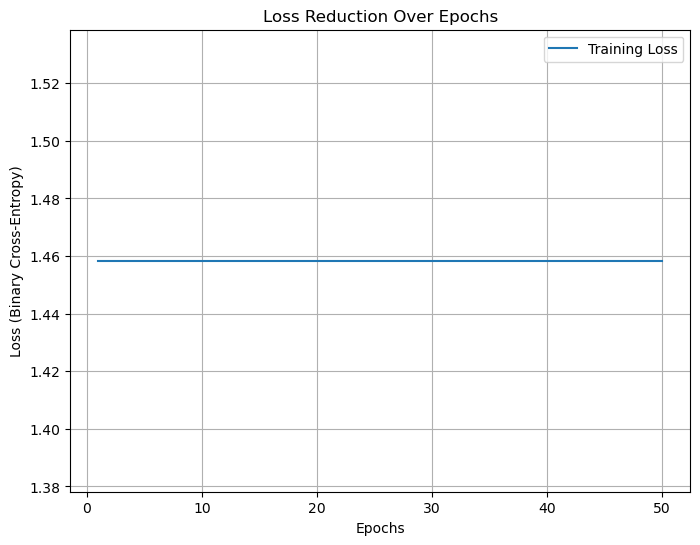

In [ ]:
if (epoch + 1) % 10 == 0:
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (Binary Cross-Entropy)')
plt.title('Loss Reduction Over Epochs')
plt.legend()
plt.grid()

In [18]:
"""
Challenge in Manual Backpropagation:
One major challenge is ensuring correct gradient calculations for each layer. The chain rule must be applied meticulously,
and errors in derivatives can propagate through the network, leading to incorrect updates. This process is error-prone
and computationally intensive, especially for deeper networks. Automated frameworks like TensorFlow or PyTorch simplify
this by handling gradients automatically.
"""

'\nChallenge in Manual Backpropagation:\nOne major challenge is ensuring correct gradient calculations for each layer. The chain rule must be applied meticulously,\nand errors in derivatives can propagate through the network, leading to incorrect updates. This process is error-prone\nand computationally intensive, especially for deeper networks. Automated frameworks like TensorFlow or PyTorch simplify\nthis by handling gradients automatically.\n'